In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

### Q: Is the average rating of our new drink better or worse than the average rating of our old drink?

What sample size is needed to "precisely" answer this question?

The average rating of our old drink is 2 stars (on a 1-3 scale)
Without any additional info, let's just pick some reasonable "true" distribution for ratings on our new drink:

* 1 Star - 15%
* 2 Star - 65%
* 3 Star - 20%

So that the average rating is $1 \times 0.15 + 2 \times 0.65 + 3 \times 0.2 = 2.05$

Now ... how many samples from this distribution would it take to "precisely" say that the new drink is better?


In [18]:
RATING_DISTR = np.array([0.15, 0.65, 0.2])
OLD_RATING = 2

In [19]:
def generate_ratings(rating_distr, n):
    # generates n ratings from the given ratings distribution
    randvals = np.random.random(n).reshape(-1,1)
    ratings = np.argmax(randvals < rating_distr.cumsum(), axis=1) + 1
    return ratings

In [20]:
ratings = generate_ratings(RATING_DISTR, 100_000)
for i in [1,2,3]:
    print('{} Star: {}'.format(i, np.mean(ratings == i)))
print('Average Rating: {}'.format(ratings.mean()))

1 Star: 0.14777
2 Star: 0.65192
3 Star: 0.20031
Average Rating: 2.05254


In [21]:
def simulate(rating_dist, n):
    avgs = []
    for _ in range(10_000):
        avgs.append(generate_ratings(rating_dist, n).mean())
    return np.array(avgs)

In [28]:
def plot_results(avgs, n, plot=True):
    avg, sd = round(avgs.mean(),3), round(avgs.std(),3)
    if avg > OLD_RATING:
        pct = np.mean(avgs > OLD_RATING)
    else:
        pct = np.mean(avgs < OLD_RATING)
    if plot:    
        plt.figure(figsize=(15, 5))
        #sns.set(rc={'figure.figsize':(15, 4)})
        #sns.displot(avgs, kind='kde')
        sns.displot(avgs, kde=True)
        plt.title('n={}\nAvg: {} | STD: {}\nPct Distr: {}'.format(n, avg, sd, pct), fontsize=20)
        plt.axvline(OLD_RATING, color='r')
        plt.xlabel('Avg Rating', fontsize=16)
    return pct

0.5069

<Figure size 1080x360 with 0 Axes>

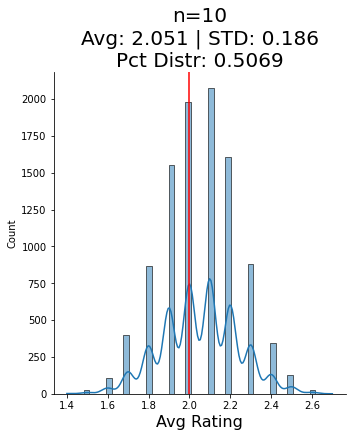

In [23]:
n = 10
avgs = simulate(RATING_DISTR, n)
plot_results(avgs, n)

0.777

<Figure size 1080x360 with 0 Axes>

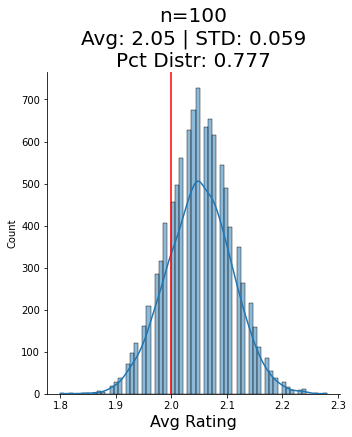

In [24]:
n = 100
avgs = simulate(RATING_DISTR, n)
plot_results(avgs, n)

0.9948

<Figure size 1080x360 with 0 Axes>

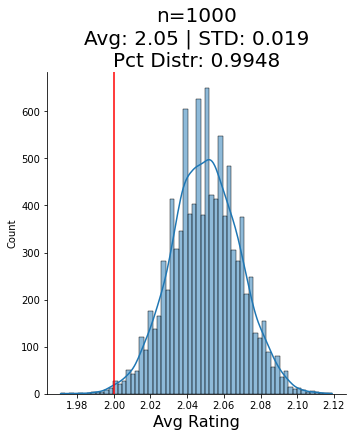

In [25]:
n = 1000
avgs = simulate(RATING_DISTR, n)
plot_results(avgs, n)

What if the tru rating distribution is the following?
* 1 Star - 5%
* 2 Star - 50%
* 3 Star - 45%

So that the average rating is $1 \times 0.05 + 2 \times 0.5 + 3 \times 0.45 = 2.4$

Now, how many samples do we need to "confidently" claim the new drink is better?

<Figure size 1080x360 with 0 Axes>

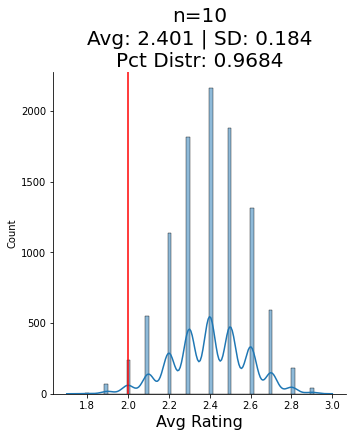

In [14]:
RATING_DISTR = np.array([0.05, 0.5, 0.45])

n = 10
avgs = simulate(RATING_DISTR, n)
plot_results(avgs, n)

### Try different true distributions and find the required sample size

In [27]:
# get many possible rating distributions
rating_distributions = []
p1_vals = np.arange(0, 1.1, .1)
for p1 in p1_vals:
    for p2 in np.arange(0, 1 - p1, 0.1):
        rating_distributions.append(np.array([p1, p2, 1 - p1 - p2]))

In [37]:
# this list will store the required sample size for each rating distribution
required_sample_sizes = []
for dist in tqdm(rating_distributions):
    req_samp_size = -1
    for n in [5, 10, 25, 50, 100, 250, 500, 1000]:
        avg_ratings = simulate(dist, n)
        pct = plot_results(avg_ratings, n, plot=False)
        if pct > 0.95:
            req_samp_size = n
            break
    required_sample_sizes.append(req_samp_size)

100%|██████████| 55/55 [00:28<00:00,  1.93it/s]


In [38]:
p1_vals = np.array([item[0] for item in rating_distributions])
p2_vals = np.array([item[1] for item in rating_distributions])

### Infinite sample size line

$E[ratings]=2 \implies 1\times p_1 + 2p_2 + 3(1-p_1-p_2)=2 \implies p_2=1-2p_1$ 

/Users/aemadzadeh/miniconda3/lib/python3.9/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


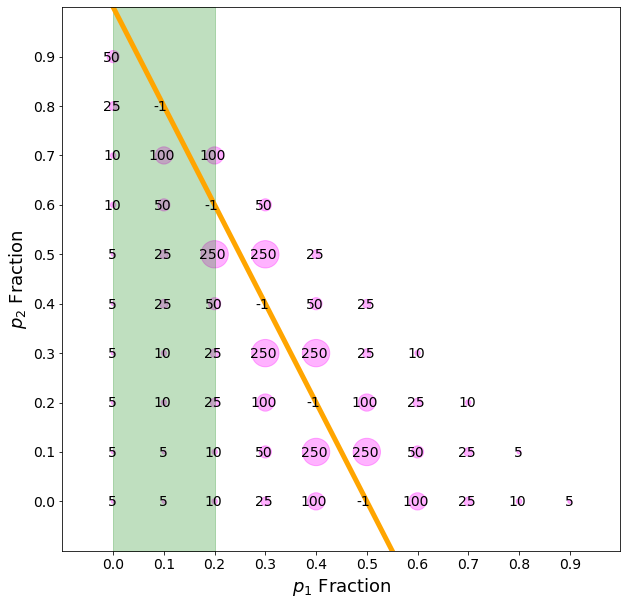

In [99]:
radii = 3 * np.array(required_sample_sizes)
plt.figure(figsize=(10, 10))
plt.scatter(p1_vals, p2_vals, s=radii, alpha=0.3, color='magenta')
plt.xticks(np.arange(0, 1, .1), fontsize=14)
plt.yticks(np.arange(0, 1, .1), fontsize=14)
plt.xlabel('$p_1$ Fraction', fontsize=18)
plt.ylabel('$p_2$ Fraction', fontsize=18)
plt.plot(p1_vals, 1 - 2 * p1_vals, lw=5, color='orange')
for i, rsz in enumerate(required_sample_sizes):
    plt.annotate(rsz, (p1_vals[i] - .01 * len(str(rsz)), p2_vals[i] - .01), fontsize=14)
plt.xlim(-.1, 1)
plt.ylim(-.1, 1)
plt.fill_betweenx([-.1, 1], 0, 0.2, color='green', alpha=0.25)